<a href="https://colab.research.google.com/github/Kamna-S/ECG-HEART-RATE-CAREGORIZATION/blob/main/ECG_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECG Categorization**

In [1]:
!pip install livelossplot

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display,clear_output
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

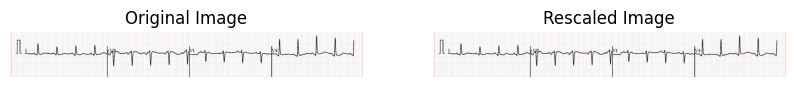

In [5]:
import matplotlib.pyplot as plt

test_datagen = ImageDataGenerator(rescale=1./255)
img = Image.open('/content/drive/MyDrive/abnormal (1)/211.1 (1).png')
img_array = np.array(img)
rescaled_img_array = test_datagen.apply_transform(img_array, {'rescale': 1./255})
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rescaled_img_array)
plt.title('Rescaled Image')
plt.axis('off')

plt.show()

In [6]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/data/train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/data/test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 14790 images belonging to 6 classes.
Found 6832 images belonging to 6 classes.


In [7]:
x_train.class_indices

{'Abnormal': 0,
 'Abnormal (1)': 1,
 'Abnormal (2)': 2,
 'Abnormal (3)': 3,
 'Abnormal (4)': 4,
 'Normal': 5}

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [10]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(128, (3, 3), activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

In [17]:
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

In [18]:
model.add(Dense(units = 6,activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [20]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.5 MB/s eta 0:00:00


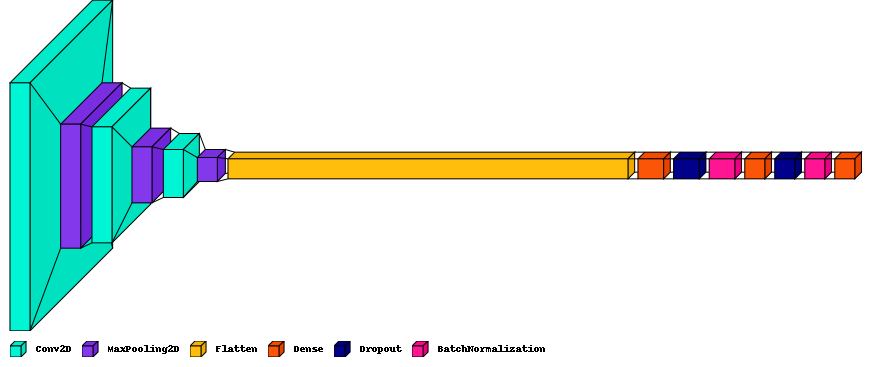

In [21]:
from tensorflow.keras import layers
from collections import defaultdict
import tensorflow as tf
import visualkeras
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
color_map[layers.Dropout]['fill'] = '#00008B'
color_map[layers.BatchNormalization]['fill'] = '#FF1493'
visualkeras.layered_view(model, legend=True,color_map=color_map)

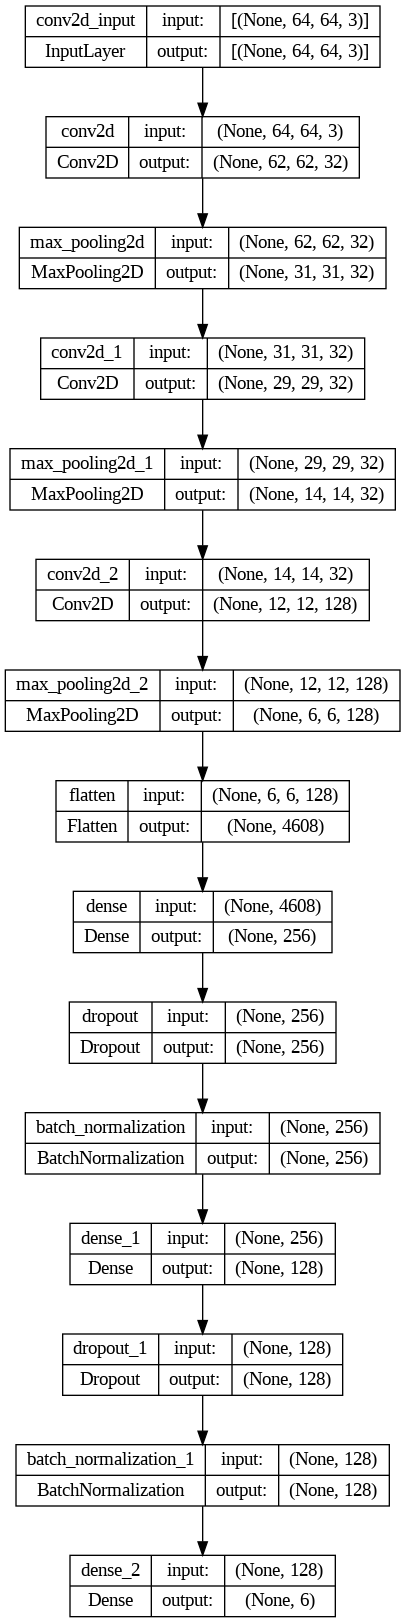

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False)


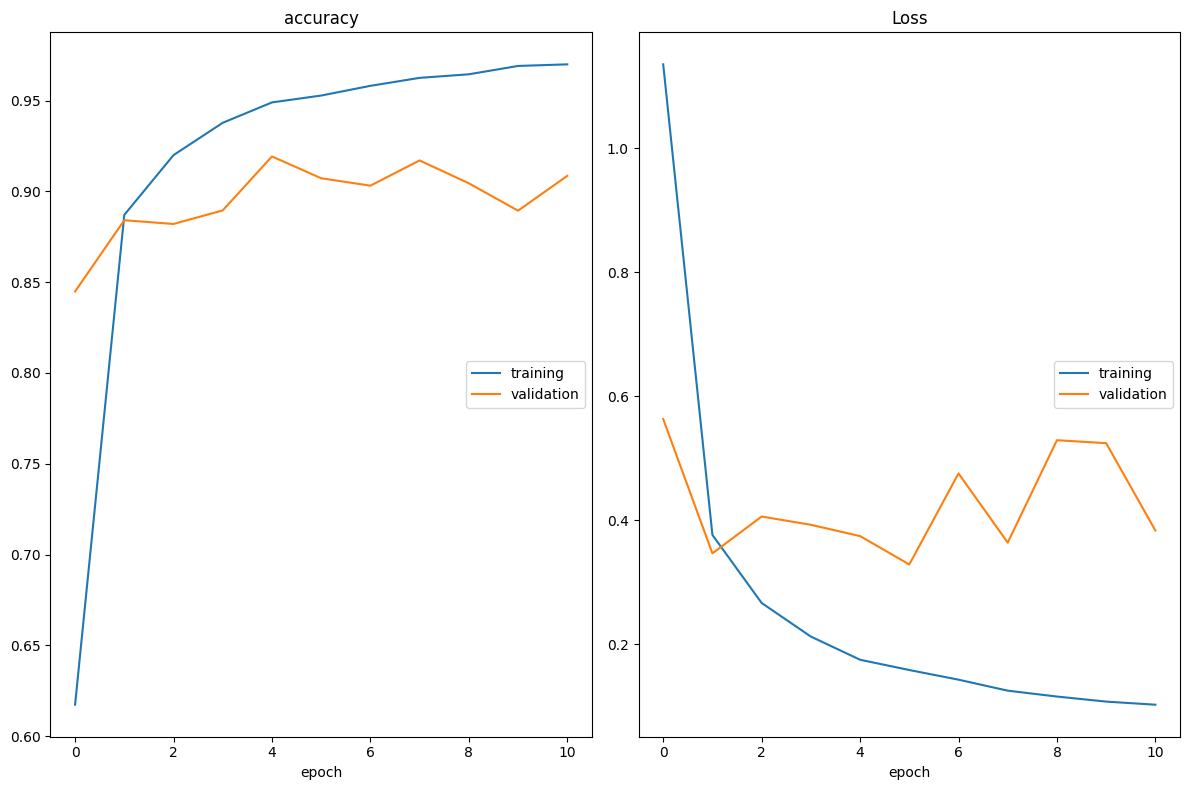

accuracy
	training         	 (min:    0.617, max:    0.970, cur:    0.970)
	validation       	 (min:    0.845, max:    0.919, cur:    0.909)
Loss
	training         	 (min:    0.102, max:    1.135, cur:    0.102)
	validation       	 (min:    0.329, max:    0.563, cur:    0.383)
463/463 [==============================] - 154s 333ms/step - loss: 0.1023 - accuracy: 0.9699 - val_loss: 0.3833 - val_accuracy: 0.9085 - lr: 3.4868e-04


In [25]:
history = model.fit_generator(generator=x_train, steps_per_epoch=len(x_train), epochs=50,
                              validation_data=x_test, validation_steps=len(x_test),
                              callbacks=[PlotLossesKeras(), lr_scheduler, early_stopping, model_checkpoint])


In [26]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [27]:
evaluation_result = model.evaluate_generator(generator=x_test, steps=len(x_test))
accuracy = evaluation_result[1]
print(f"Accuracy of the model on the test dataset: {accuracy:.2%}")

<ipython-input-27-fa29421fcb97>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation_result = model.evaluate_generator(generator=x_test, steps=len(x_test))


Accuracy of the model on the test dataset: 90.72%


In [28]:
y_pred = model.predict_generator(x_test, steps=len(x_test))
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = x_test.classes

TP = np.sum((y_true_labels == 1) & (y_pred_labels == 1))
FP = np.sum((y_true_labels == 0) & (y_pred_labels == 1))
TN = np.sum((y_true_labels == 0) & (y_pred_labels == 0))
FN = np.sum((y_true_labels == 1) & (y_pred_labels == 0))

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


<ipython-input-28-f52ff8faecf2>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(x_test, steps=len(x_test))


True Positives (TP): 479
False Positives (FP): 83
True Negatives (TN): 7
False Negatives (FN): 52
Precision: 0.8523131672597865
Sensitivity (Recall): 0.9020715630885122
Specificity: 0.07777777777777778
F1 Score: 0.8764867337602927


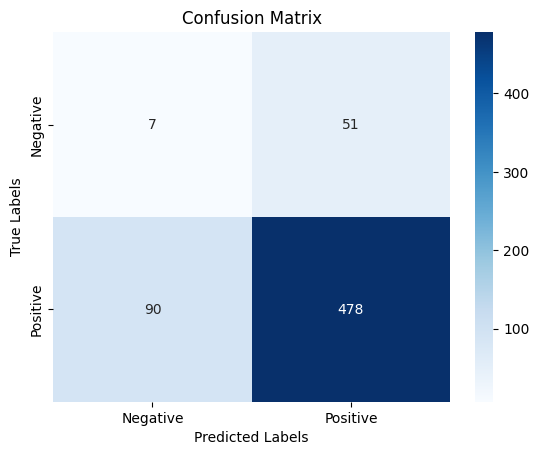

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = np.array([[7, 51], [90, 478]])

labels = ['Negative', 'Positive']

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
img=image.load_img("/content/drive/MyDrive/Unknown_image.png",target_size=(64,64))

In [32]:
x=image.img_to_array(img)

In [33]:
x=np.expand_dims(x,axis=0)

In [34]:
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred

1/1 [==============================] - 0s 200ms/step


5

In [35]:
index= ['Abnormal',
 'Abnormal (1)',
 'Abnormal (2)',
 'Abnormal (3)',
 'Abnormal (4)',
 'Normal']

result = str(index[y_pred])
result


'Normal'

# **Streamlit**

In [50]:
!pip install -q streamlit

In [51]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image, ImageOps

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('/content/my_model.hdf5')
    return model

def import_and_predict(image_data, model):
    size = (64, 64)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

st.write("# ECG CATEGORIZATION")
file = st.file_uploader("Please upload an ECG image file", type=["jpg", "png"])

if file is None:
    st.text("Please upload an image file")
else:
    model = load_model()
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ['Abnormal', 'Abnormal (1)', 'Abnormal (2)', 'Abnormal (3)', 'Abnormal (4)', 'Normal']
    score = tf.nn.softmax(predictions[0])
    predicted_class = np.argmax(score)
    confidence = 100 * np.max(score)
    st.write("Predicted Class:", class_names[predicted_class])



Overwriting app.py


In [52]:
!streamlit run /content/app.py &>/content/logs.txt &

In [53]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.046s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [54]:
!pip install pyngrok

In [55]:
!ngrok authtoken 2RQa8ZXebsOb9exFVLdjmtu8D48_4iM7z2JoMMnhj8SMgBTEY

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [56]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.192.130.7
npx: installed 22 in 4.314s
your url is: https://fast-buckets-attend.loca.lt
